# Introduction to Modeling Stock Returns

In this notebook, we will explore the concept of modeling stock returns using historical stock price data. Understanding stock returns is crucial for investors and analysts as it helps in assessing the performance of investments and making informed decisions.

We will focus on the following key aspects:

1. **Stock Returns**: We'll define stock returns and explain how they are calculated. Stock returns indicate how much an investor earns or loses over a specific period, usually expressed as a percentage of the initial investment.

2. **Data Acquisition**: We will import historical stock price data, typically containing open, high, low, close prices, and trading volume. For our examples, we will use the stock data of well-known companies like Apple and Tesla.

3. **Data Processing**: We will preprocess the data to calculate daily returns, which will serve as our primary metric for analysis. This step will also involve cleaning the data and handling any missing values.

4. **Modeling Returns**: We will explore different statistical models that can be used to predict stock returns. This includes regression analysis, which helps us understand the relationship between stock returns and other factors.

5. **Visualization**: Throughout the notebook, we will create visualizations to better understand the data and the returns' distribution. Graphs such as histograms, line charts, and scatter plots will help illustrate our findings.

6. **Conclusion**: Finally, we will summarize our findings and discuss the implications of the modeled returns for investment strategies.

By the end of this notebook, you will have a solid understanding of how to model stock returns, along with practical skills in data analysis and visualization. Let’s get started!


# Modeling Stock Return

In this section, we will import necessary libraries and load the Apple stock data. We will then plot the closing price of Apple stock for the period between September 1, 2013, and September 1, 2014. This visualization helps us observe the stock's price movements over this time frame.

<Axes: xlabel='date'>

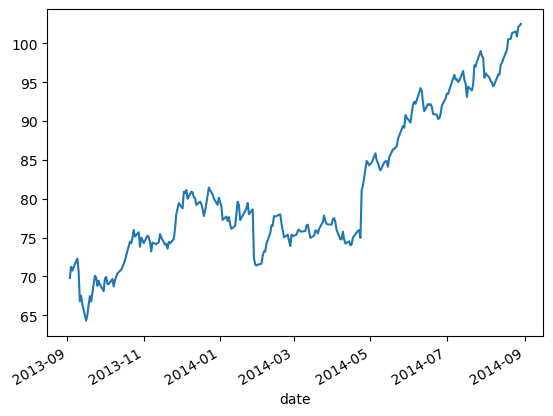

In [1]:
#Modelling Stock Return 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # Import the normal distribution functions from SciPy



aapl = pd.read_csv('AAPL_data.csv', parse_dates=True, index_col='date')
aapl.loc['2013-09-01':'2014-09-01','close'].plot()
#Plotting the stock price of apple - between 2013 - 2014

# Calculating and Visualizing Log Returns

In this step, we calculate the **log returns** of Apple's closing prices. Log returns are often used in financial analysis because they allow for a better understanding of percentage changes over time.

We then create a histogram to visualize the distribution of these log returns. This helps us analyze the stock's performance and volatility over the chosen period.



<Axes: >

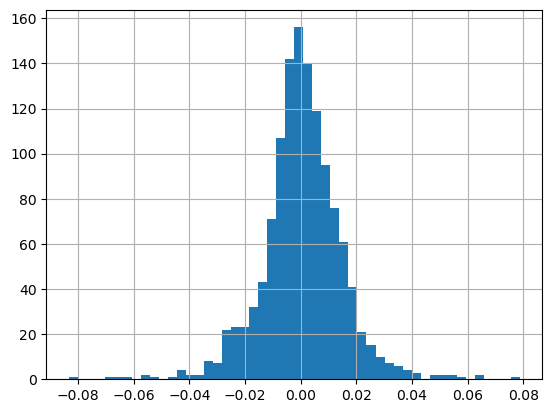

In [3]:
# Log return is the difference between the logarithm of the current day's price and the next day's price.
#The log of the stock price returns the percentage change - 
# which is useful for analyzing the perfomance of stocks 
aapl['LogReturn'] = np.log(aapl['close']).shift(-1) - np.log(aapl['close'])

# Plot a histogram of the log returns with 50 intervals.
# This helps visualize the distribution of the log returns over time.
# A good way of visualizing stock return

aapl['LogReturn'].hist(bins=50)

# Visualizing the Normal Distribution

In this section, we simulate and visualize a **normal distribution** using a range of values from -4 to 4, which typically covers most of the values within a standard normal distribution (mean = 0, standard deviation = 1). 

We calculate both the **Probability Density Function (PDF)**, which shows the likelihood of a specific value, and the **Cumulative Distribution Function (CDF)**, which shows the probability of a value being less than or equal to a given value. Finally, we plot the PDF, giving us a visual representation of the classic bell curve.

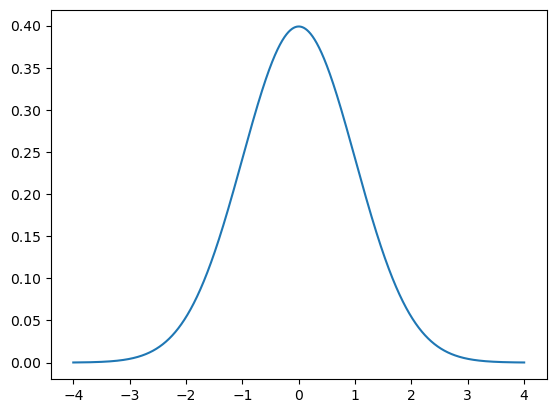

In [2]:
from scipy.stats import norm  # Import the normal distribution functions from SciPy

# Create an empty DataFrame to hold our data
density = pd.DataFrame()

# Create a range of values from -4 to 4 with a step of 0.001, simulating a normal distribution
# This range could theoretically go from negative infinity to positive infinity, 
# but we're using -4 to 4 for simplicity, as most values of a standard normal distribution are within this range.
density['x'] = np.arange(-4, 4, 0.001)

# Calculate the probability density function (PDF) for the standard normal distribution (mean=0, std=1)
# This gives us the likelihood of a random variable being exactly a specific value within the range.
density['pdf'] = norm.pdf(density['x'], 0, 1)

# Calculate the cumulative distribution function (CDF) for the standard normal distribution (mean=0, std=1)
# The CDF shows the probability of the random variable being less than or equal to a certain value.
density['cdf'] = norm.cdf(density['x'], 0, 1)

# Plot the PDF (probability density function) - This will show the bell curve of the normal distribution.
plt.plot(density['x'], density['pdf'])





# Calculating the Mean and Standard Deviation of Log Returns

In this section, we calculate two important statistical metrics from the log returns of Apple's stock:

1. **Mean (μ)**: This represents the average log return of the stock, helping us understand the expected return.
2. **Standard Deviation (σ)**: This measures the volatility or risk associated with the stock's returns.

In [20]:
# Calculate the approximate mean of the log daily returns for the stock
mu = aapl['LogReturn'].mean()


# Calculate the standard deviation of the log daily returns
# 'ddof=1' indicates that we are using the sample standard deviation formula,
# which divides by (N-1) instead of N. This is used when calculating the standard deviation from a sample.
sigma = aapl['LogReturn'].std(ddof=1)


# Print the mean and standard deviation (sigma) values
print(mu, sigma)


0.0006795972884460615 0.014589526072642738


# Probability of Losing Over 5% in a Day

Using the previously calculated mean (μ) and standard deviation (σ), we can determine the probability of Apple's stock losing more than 5% in a single day. This is done using the cumulative distribution function (CDF) from the normal distribution. By evaluating the CDF at -5%, we find the likelihood of a daily return being less than -5%.

In [28]:
# Using these values to determine the chance of losing over 5 percent in a day

prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)


The Probability is  0.00025666990115661564


# Calculating the Probability of a 40% Drop Over One Year

In this section, we calculate the mean and standard deviation for Apple's stock returns over a one-year period (assuming 220 trading days). We use these values to estimate the probability of the stock dropping by more than 40% over the year. This is done by scaling the daily mean and standard deviation to annual figures and applying the cumulative distribution function (CDF) from the normal distribution.

In [29]:
# Calculate the mean and standard deviation for a one-year period (220 trading days)
# The mean return over 220 days is calculated by multiplying the daily mean (mu) by the number of trading days
mu220 = 220 * mu  

# The standard deviation for the annual return is calculated by taking the square root of the number of trading days (220)
# This is because the variance of independent random variables adds, and standard deviation is the square root of variance.
sigma220 = (220 ** 0.5) * sigma  

# Print the calculated mean and standard deviation for the one-year period
print(mu220, sigma220)

# Print a message indicating we are about to calculate the probability of a drop greater than 40% in 220 days
print("The probability of dropping over 40 percent in 220 days is")

# Calculate the cumulative probability of a drop greater than 40% (i.e., the probability that the return is less than -0.4)
# This is done using the cumulative distribution function (CDF) of the normal distribution.
# norm.cdf() returns the probability that a normally distributed random variable is less than or equal to a specified value
probability_drop = norm.cdf(-0.4, mu220, sigma220)

# Print the probability of dropping over 40% in 220 days
print(probability_drop)


0.14951140345813355 0.2163976423747516
 The probability of dropping over 40 percent in 220 day is


0.005552782480154427

# Value at Risk (VaR) Calculation

In this section, we calculate the Value at Risk (VaR), which measures the maximum expected loss over a single day at a 5% confidence level. Using the inverse of the cumulative distribution function (ppf), we estimate the loss that would only be exceeded 5% of the time based on Apple's stock returns.

In [30]:
# Value at Risk (VaR) calculation using the inverse of the cumulative distribution function (ppf)
# VaR represents the maximum expected loss over a specified time period (in this case, one day)
# at a certain confidence level (here, 5%).

# norm.ppf(0.05, mu, sigma) calculates the value at risk for a single day
# 0.05 represents the 5% quantile, meaning we are looking for the loss that would only be exceeded 5% of the time
# mu is the mean return and sigma is the standard deviation, representing the normal distribution of returns.
VaR = norm.ppf(0.05, mu, sigma)

# Print the calculated Value at Risk for a single day
print('Single day value at risk:', VaR)


Single day value at risk  -0.023318037587643423


# Quantile Calculation

This section calculates the 5% and 95% quantiles, which represent the boundaries within which 90% of the returns are expected to fall. The 5% quantile gives the lower bound (potential loss), while the 95% quantile provides the upper bound (potential gain).



In [31]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.023318037587643423
95% quantile  0.02467723216453554


# Apply the Same Analysis to Tesla Stock

Now that we've walked through modeling stock returns and risk for Apple, it's your turn to apply these concepts to Tesla's stock. You'll follow similar steps to calculate log returns, visualize distributions, and measure risk metrics such as the Value at Risk (VaR) and quantiles.

### Steps:
1. **Load Tesla's stock data**: Use a CSV file containing Tesla's stock prices.
2. **Plot Tesla's closing prices**: Visualize the stock prices for a selected time range.
3. **Calculate Tesla's log returns**: Use the same formula to compute log returns for Tesla.
4. **Visualize the log return distribution**: Plot a histogram of the log returns to see their distribution.
5. **Calculate the mean and standard deviation**: Determine the mean and volatility (standard deviation) of Tesla's log returns.
6. **Estimate risk metrics**: Use the cumulative distribution function (CDF) and percent point function (PPF) to estimate Tesla's risk of significant loss or gain (e.g., over 5% in a day).

### Reminder:
- You can refer back to the code we used for Apple and adapt it for Tesla.
- Feel free to experiment with different time periods or assumptions to get a better understanding of Tesla's stock behavior.


In [4]:
# 1. Import necessary libraries for working with data, performing calculations, and plotting results

# 2. Load Tesla stock data from a CSV file
# Make sure the CSV file contains columns like 'date' and 'close' (closing prices)


# 3. Plot the closing prices of Tesla over a specific time range
# Modify the date range as per your dataset to observe trends over time


# 4. Calculate the log returns for Tesla stock
# Log return is calculated by taking the natural logarithm of the ratio of the next day's price to the current day's price


# 5. Visualize the distribution of Tesla's log returns
# Plot a histogram with a specified number of bins to visualize the distribution

# 6. Calculate the mean and standard deviation of Tesla's log returns

# 7. Calculate the probability of a significant daily loss (e.g., 5% drop) for Tesla

# 8. Calculate the one-year mean return and volatility (220 trading days)


# The annual volatility is calculated as the daily volatility multiplied by the square root of 220


# Print the annualized mean return and volatility for Tesla


# 9. Calculate the Value at Risk (VaR) for Tesla

# 10. Calculate the 5% and 95% quantiles for Tesla's daily returns


